<a href="https://colab.research.google.com/github/benasphy/SVM/blob/main/SVM_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param  # regularization
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Convert labels from {0, 1} to {-1, 1}
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent training
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Check the constraint: yi * (w·xi + b) >= 1
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # If correctly classified, only apply regularization
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Misclassified → update both w and b
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)


In [10]:
# Example dataset
X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [2, 1],
    [3, 2]
])
y = np.array([0, 0, 0, 1, 1])  # two classes

# Train
clf = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
clf.fit(X, y)

# Predict
predictions = clf.predict(X)
print("Predictions:", predictions)


Predictions: [-1. -1. -1.  1.  1.]


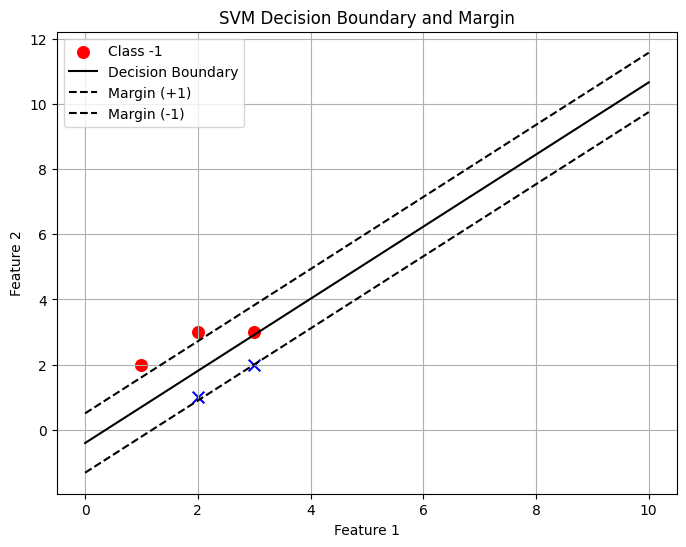

In [11]:
def get_line(x, w, b, offset=0):
    return (-w[0]*x - b + offset) / w[1]

plt.figure(figsize=(8,6))

# Plot points
for i, label in enumerate(np.where(y <= 0, -1, 1)):
    if label == -1:
        plt.scatter(X[i,0], X[i,1], color='red', marker='o', s=70, label='Class -1' if i==0 else "")
    else:
        plt.scatter(X[i,0], X[i,1], color='blue', marker='x', s=70, label='Class +1' if i==5 else "")

# Draw decision boundary and margins
x0 = np.linspace(0, 10, 100)
decision_boundary = get_line(x0, svm.w, svm.b)
margin_positive = get_line(x0, svm.w, svm.b, 1)
margin_negative = get_line(x0, svm.w, svm.b, -1)

plt.plot(x0, decision_boundary, 'k-', label='Decision Boundary')
plt.plot(x0, margin_positive, 'k--', label='Margin (+1)')
plt.plot(x0, margin_negative, 'k--', label='Margin (-1)')

plt.title("SVM Decision Boundary and Margin")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()